In [9]:
import numpy as np
import pylab as mplot

%pylab inline


import pickle
with open("../SPmap_linefit.pk", "rb") as file_pk:
    LineFit_read = pickle.load(file_pk)

mplot.rc('text', usetex=True)
mplot.rc('font', family='serif')


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


From shear cat
* T ratio 
* s/n
* (PSF e1)
* (PSF e2)

From Peter’s maps
* Depth i
* Brightness i
* Exp time i
* Airmass i
* Seeing i


In [10]:
LineFit_read

{'delve_dr3_1_1_r_airmass_wmean': (0.00014724355305547858,
  -0.00016504759501420068,
  array([[ 5.24203865e-08, -7.49523512e-08],
         [-7.49523512e-08,  1.09760024e-07]]),
  -0.00014487258410960708,
  -0.0004501054017420081,
  array([[ 6.77552043e-08, -9.68828958e-08],
         [-9.68828958e-08,  1.41877972e-07]])),
 'delve_dr3_1_1_g_airmass_wmean': (3.5076615832713316e-05,
  2.962914251011959e-06,
  array([[ 4.39475787e-08, -6.09511456e-08],
         [-6.09511456e-08,  8.71608397e-08]]),
  -0.0001890334033872803,
  -0.00039219201788524773,
  array([[ 4.21969732e-08, -5.85159350e-08],
         [-5.85159350e-08,  8.36667679e-08]])),
 'delve_dr3_1_1_i_airmass_wmean': (9.52243983557398e-05,
  -8.920900954405922e-05,
  array([[ 8.11971480e-08, -1.12379911e-07],
         [-1.12379911e-07,  1.59760729e-07]]),
  -0.00032502229158598046,
  -0.0002033564724578992,
  array([[ 3.52847303e-08, -4.88353428e-08],
         [-4.88353428e-08,  6.94243121e-08]])),
 'delve_dr3_1_1_z_airmass_wmean':

In [12]:
list_plot = ['delve_dr3_1_1_i_maglim_wmean', 'delve_dr3_1_1_i_skybrite_wmean', 'delve_dr3_1_1_i_exptime_sum', 'delve_dr3_1_1_i_airmass_wmean', 'delve_dr3_1_1_i_fwhm_wmean', 'size_ratio', 's2n'] #, 'psf_e1', 'psf_e2']
sp_title = ['Depth i', 'Brightness i', 'Exp time i', 'Airmass i', 'Seeing i', '$T/T_{\\rm PSF}$', 'SNR'] #, '$e_{\\rm 1, PSF}$', '$e_{\\rm 2, PSF}$']

Y1 = []
Y2 = []
for i in range(len(list_plot)):
    out = LineFit_read[list_plot[i]]
    y1 = out[0]/out[2][0][0]**0.5
    y2 = out[3]/out[5][0][0]**0.5
    Y1.append(y1)
    Y2.append(y2)

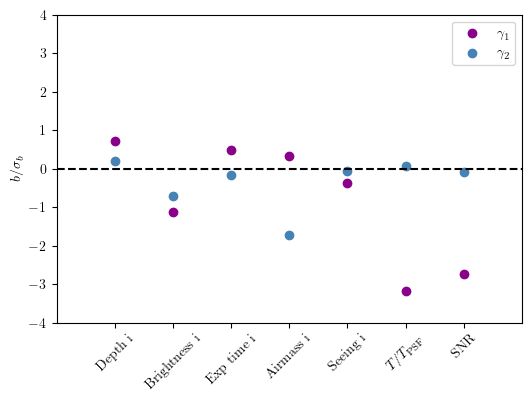

In [13]:
mplot.figure(figsize=(6,4))
ax = mplot.subplot(111)
mplot.scatter(np.arange(7), Y1, color='darkmagenta', label='$\gamma_1$')
mplot.scatter(np.arange(7), Y2, color='steelblue', label='$\gamma_2$')
mplot.plot([-1,7], [0,0], ls='--', color='k')
mplot.ylim(-4,4)
mplot.xlim(-1,7)
mplot.ylabel('$b / \sigma_{b}$')
x = [0,1,2,3,4,5,6]
ax.set_xticks(x)
ax.set_xticklabels(sp_title, minor=False, rotation=45)
mplot.legend()

mplot.savefig('SP_g.pdf', bbox_inches='tight')